In [1]:
from sklearn.datasets import fetch_olivetti_faces
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score

X, y = fetch_olivetti_faces(random_state=42, return_X_y=True)

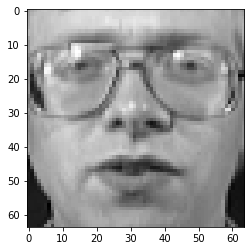

In [2]:
some_image = X[19].reshape((64,64))
plt.imshow(some_image, cmap='gray')

In [3]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.4, random_state=42)
for train_index, test_val_index in split.split(X,y):
    X_train, X_test_val = X[train_index], X[test_val_index]
    y_train, y_test_val = y[train_index], y[test_val_index]

In [4]:
split2 = StratifiedShuffleSplit(n_splits=1, test_size=0.5, random_state=42)
for test_index, val_index in split2.split(X_test_val,y_test_val):
    X_test, X_val = X_test_val[test_index], X_test_val[val_index]
    y_test, y_val = y_test_val[test_index], y_test_val[val_index]

In [14]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.99)
X_train_red = pca.fit_transform(X_train)
X_val_red = pca.transform(X_val)

In [19]:
from sklearn.mixture import GaussianMixture
gm = GaussianMixture(n_components=40, random_state=42)
y_pred = gm.fit_predict(X_train_red)

In [27]:
new_faces = gm.sample()

In [32]:
rec_face = pca.inverse_transform(new_faces[0])

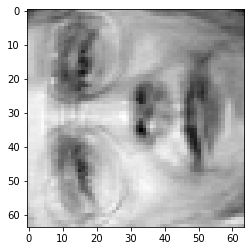

In [38]:
from skimage.transform import rotate
gen_face = rec_face.reshape((64,64))
rot_face = rotate(gen_face,90)
plt.imshow(rot_face, cmap="gray")
rot_face_pca = pca.transform(rotate(rec_face,90))

In [39]:
gm.score_samples(rot_face_pca)

array([-1.69713472e+08])

In [43]:
gm.score_samples(X_train_red[:5])

array([949.87369732, 999.73722131, 978.66384031, 949.87369498,
       979.92197709])

### Exercise 13

In [47]:
def reconstruction_errors(pca, X):
    X_pca = pca.transform(X)
    X_reconstructed = pca.inverse_transform(X_pca)
    mse = np.square(X_reconstructed - X).mean(axis=-1)
    return mse

In [48]:
reconstruction_errors(pca, X_train).mean()

0.00018910908

In [49]:
reconstruction_errors(pca, rotate(rec_face,90)).mean()

0.0019256494487489037